# Using a New Dataset to Evaluate Stoke's Settling Velocity

**Prepared by:** Kristin Swartz (kswarts3@nd.edu) and Alexis Laudenslager (alaudens@nd.edu)

**Reference:** This is an original problem created by the authors.


**Intended Audience:** The intended audience of this notebook is students learning Python coding and probability theory, for example, in CBE 60258.

## Learning Objectives

After studying this notebook and asking questions in class, you should be able to:


*   Fit linear and nonlinear regression models to real data
*   Plot a histogram of the **residuals** and verify the distribution
*   Create a confidence interval for the model



## Resources

Relevant modules on the class website:

1. [Linear Regression with Transformations](https://ndcbe.github.io/data-and-computing/notebooks/15/Transformations-and-Linear-Regression.html?highlight=transformation)


2. [Nonlinear Regression](https://ndcbe.github.io/data-and-computing/notebooks/15/advanced_regression.html?highlight=nonlinear)


3. [Plotting a Histogram of the Residuals](https://ndcbe.github.io/data-and-computing/notebooks/09/Visualizing-Data.html?highlight=histogram#histogram)


## Import Libraries

## 1. Background


### 1.1 Problem Statement
In this notebook, we'll be analyzing a small portion of data from experiments designed to determine the settling rate of particles in a turbulent environment. Understanding how long solid particles remain suspended in a turbulent environment is important for predicting the formation and characteristics of clouds, which require such particles for their existence. Clouds have a significant impact on the climate, so this area of research is relevant for short term and long term climate modeling.

We have a model for particle settling rates in a nonturbulent environment known as Stoke's settling velocity, or Stoke's law. In a turbulent environment, however, things are much more complicated. In this research, we're attemping to determine if Stoke's law is predictive over some range of particle size and density in a turbulent environment.

For the experiments, particles from 1 - 30 microns were injected into a turbulence-generating chamber. After the chamber achieved a certain concentration of particles, the injection was stopped. At that point, particle size and concentration measurements were taken at regular intervals in order to observe the decay of particles in the chamber. From these measurement, we can determine the settling velocity and compare it to Stoke's law.

**We'll be focusing on the first part of the analysis process $-$ determining the settling rate from the collected data.** To do this, we'll use linear and nonlinear regression to determine the decay rate of 4 micron particles that were injected into the chamber. We'll then plot confidence intervals and the distribution of the residuals to assess the reliability of our model.


### 1.2 Derivation of Stoke's Law (Optional)

For this notebook, we want to look at Stoke's settling velocity, which requires setting the net force on the particle equal to zero and then determining the velocity at which this occurs. The forces acting on the particle are friction, the buoyant force, and gravity.

#### 1.2.1. Drag Force

$$ F_{D} = 6\pi\eta r v...(Eq. 1)$$

$F_{D}$ = drag (friction) force

$\eta$ = viscosity of fluid

$r$ = radius of particle

$v$ = velocity of the particle

Equation 1 shows the friction force on a particle of radius $r$ falling vertically through a fluid of viscosity $\eta$.

#### 1.2.2. Gravity Force

$$ F_{G} = \frac{4}{3}\pi r^{3} \rho g...(Eq. 2)$$

$F_{G}$ = gravitational force

$\rho$ = density of the particle

$g$ = acceleration due to gravity

Equation 2 shows the force of gravity on a particle of radius $r$ and density $\rho$.

#### 1.2.3. Bouyant Force
$$F_{B} = \frac{4}{3}\pi r^{3} \sigma g...(Eq. 3)$$

$F_{B}$ = buoyancy force

$\sigma$ = the density of the fluid

Equation 3 shows the bouyant on a particle of radius $r$ in a fluid of density $\sigma$.

#### 1.2.4. Sum of Forces
Since we are looking for the velocity of the particle as it is falling through a moving fluid, we know that the friction force and buoyancy forces will be acting upwards and the gravitational force will be acting downwards. Thus, we can set the net force of the system equal to zero, which leads to Equation 4.

$$F_{D} + F_{B} = F_{G}...(Eq. 4)$$

We can now solve for Stoke's settling velocity using some simple alegebra. The result is shown below in Equation 5. Please write out the derivation of Equation 5 by hand and **upload to Gradescope**.

*Hint: Plug Equations 1, 2, and 3 into Equation 4, then rearrange to solve for v.*


$$v = \frac{2 r^{2} g (\rho - \sigma)}{9 \eta}...(Eq. 5)$$






**Answer:**
$$6 \pi \eta r v + \frac{4}{3} \pi r^3 \sigma g = \frac{4}{3} \pi r^{3} \rho g$$

$$6 \eta v + \frac{4}{3} \pi r^{2} \sigma g = \frac{4}{3} \pi r^{2} \rho g$$

$$6 \eta v = \frac{4}{3} r^{2} g (\rho - \sigma)$$

$$v = \frac{\frac{4}{3} r^{2} g (\rho - \sigma)}{6 \eta}$$

$$v = \frac{2 r^{2} g (\rho - \sigma)}{9 \eta}$$




### 1.3 Derivation of the Model

After we inject particles into the chamber, their only means of exiting the turbulent circulation is to settle along the bottom of the chamber. As such, we can use conservation principles to build a mathematical model for this settling behavior. Using Reynold's transport theorem, we express

$$
\frac{\partial}{\partial t} \oint_V c \ dV + \oint_S c \left( \vec v_s \cdot \hat n \right) dA = 0
$$

where $c$ is the concentration of particles in the chamber and $\vec v$ is the velocity at which the particles leave the circulation through settling. Evaluating this integral gives

$$
\frac{\partial N}{\partial t} = - c A v...(Eq. 6)
$$

which says that the change over time in the number of particles in the chamber, $N$, is equal to minus the concentration multiplied by the area over which the particles settle and their settling vecocity. If we express the settling velocity as

$$
v = \frac{h}{t'},
$$

where $h$ is the height of the chamber and $t'$ is the time the particles spend in the circulation before settling out, then our differential equation becomes

$$
\frac{\partial N}{\partial t} = - \frac{c A h}{t'}.
$$

Given that

$$
Ah = V,
$$

where $V$ is the volume of the chamber, then

$$
cAh = cV = N,
$$

and we can write

$$
\frac{\partial N}{\partial t} = - \frac{N}{t'}.
$$

The solution to this differential equation is

$$
N = N_0 e^{-\lambda t}
$$

where $N_{0}$ is the initial number of particles in the chamber and $\lambda = -\frac{1}{t'}$. We can divide this through by the volume of the chamber to get an equation more in line with the collected data (concentration over time):

$$
c = c_0 e^{-\lambda t}...(Eq. 7)
$$


We now have a mathematical model from which we can determine the settling rate. By filling the chamber with an initial concentration of particles, we can measure the decrease in concentration over time as particles fall out of the circulation and settle at the bottom of the chamber. By fitting an exponential function to this decay, we can determine the value of $\lambda$, which will be proportional to the settling velocity.


## 2. Analysis: Linear Regression

Below is the recorded data for particles with a diameter of 4 microns in one experimental trial. The array `concentration` is the series of measurements of the number of 4 micron particles per cubic centimeter in the chamber. The array `time` is the time in seconds at which each measurement was taken realative to the time of the first measurement.

In [ ]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

import scipy.optimize as optimize
from scipy.optimize import curve_fit

from scipy.stats import f, norm
import scipy.stats as stats

In [ ]:
# loading the dataset

concentration = np.array([137.48, 223.66, 122.06 , 131.4  , 106.48 ,  97.   ,  74.16 ,
        72.2  ,  53.94 ,  70.13 ,  50.72 ,  46.43 ,  80.1  ,  45.86 ,
        53.87 ,  40.14 ,  54.99 ,  24.815,  25.997,  22.662,  43.249,
        19.87 ,  17.472,  10.329,  30.588,  12.854,  15.806,  10.899,
        10.516,  10.376,   6.161,   5.558,  24.208,   4.49 ,   6.519,
        5.238,  14.103,   3.952,   4.726,   9.496,   4.172,   5.48 ,
        2.564,   3.088,   3.23 ,   3.385]) #particles per cm^3
time = np.array([0,  64, 111,  158,  206,  253,  316,  367,  424,  469,  521,
       571,  637,  687,  735,  783,  832,  895,  943,  998, 1048, 1096,
       1145, 1275, 1323, 1376, 1426, 1482, 1552, 1598, 1650, 1701, 1750,
       1803, 1856, 1911, 1962, 2009, 2094, 2149, 2199, 2258, 2313, 2361,
       2417, 2469]) #seconds

In order to do linear regression on an exponential equation, we must use a transformation. We will begin by applying a log function to both sides of Equation 7.

$$
ln(c) = ln(c_{0}) - \lambda t...(Eq. 8)
$$

From Equation 8, we can define a linear relationship of the form $Y = \beta_{0} + \beta_{1}X$. Write out which term in Equation 8 corresponds to $Y$, $X$, $\beta_{0}$, and $\beta_{1}$. *Upload your answers to Gradescope.*


**Answer**: $Y = ln(c)$, $X = t$, $\beta_{0} = ln(c_0)$, $\beta_{1} = -\lambda$

We will use SciPy's `curve_fit` to fit a linear function to our transformed data. To do this, we define a function that returns the result of Equation 8, then provide that function as an arguement to `curvefit` along with the time and log-transformed concentration arrays.

In [ ]:
#linear regression

#linear regression function
def linear(X, beta_0, beta_1, ):
    model = beta_0 + beta_1 * X
    return model

#transform the concentration for our linear modeldata
log_concentration = np.log(concentration)

#use scipy to determine best linear fit
parameters, covariance = curve_fit(linear, time, log_concentration)

#extract linear model parameters
beta_0 = parameters[0]
beta_1 = parameters[1]


### 2.1. Plot Experimental Data and Model Prediction

We want to plot our fitted model together with the experimental data in order to visually confirm the goodness of fit. But to do that, we need to transform our $\beta_0$ and $\beta_1$ back to $c_0$ and $\lambda$. Do this in the code block below, saving $\lambda$ as `decay_rate`.

In [ ]:
#transform model parameters to nonlinear function
### BEGIN SOLUTION
c_0 = np.exp(beta_0)
decay_rate = -beta_1
###END SOLUTION

#calculate modeled data values
model_concentration = c_0 * np.exp(-decay_rate * time)

print(f'Initial Concentration: {round(c_0)}')
print(f'Decay Rate: {round(decay_rate,4)}')

Initial Concentration: 141
Decay Rate: 0.0016


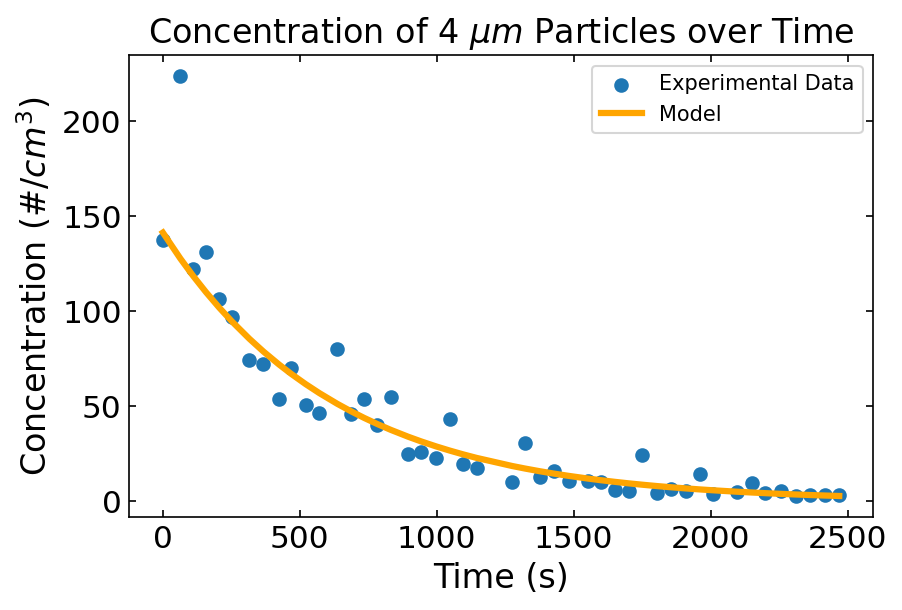

In [ ]:
#plot original data and fitted model

fig, ax = plt.subplots(figsize = (6.4,4), dpi = 150)
ax.scatter(time, concentration, label = 'Experimental Data')
ax.plot(time, model_concentration, c = 'orange', label = 'Model', linewidth = 3)

#add plot labels
ax.set_xlabel("Time (s)", fontsize = 16)
ax.set_ylabel("Concentration ($ \#/cm^3$)", fontsize = 16)
ax.set_title("Concentration of 4 $\mu m$ Particles over Time", fontsize = 16)

#set tick parameters
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tick_params(direction="in",top=True, right=True)

#add legend
plt.legend()

#show plot
plt.show()

### 2.2. Plot the Resiudals
Visually, the model looks like a decent fit of the data. We can further assess our model by observing the distribution of the residuals. If our model is good, we expect the residuals to have a normal distribution. Let's check by plotting our residuals in a histogram.

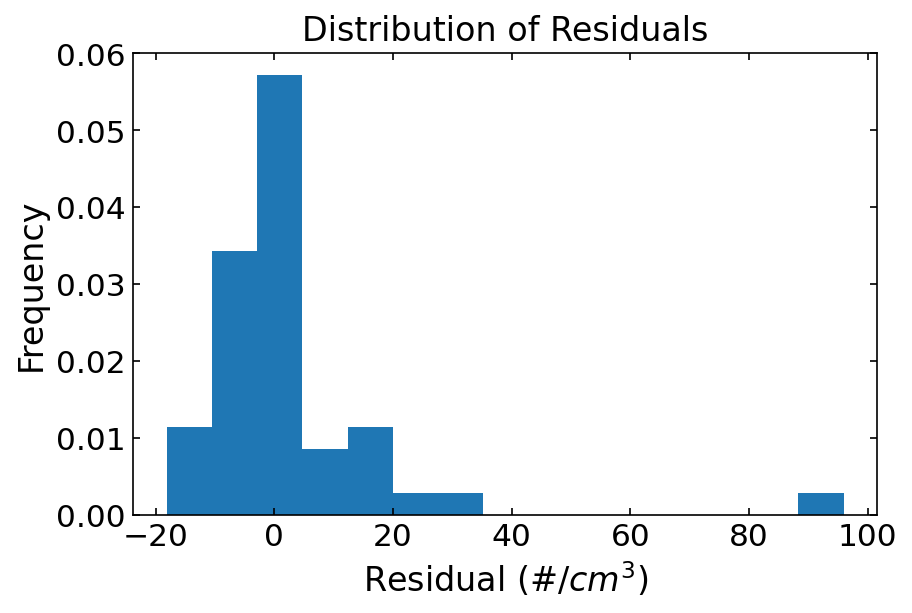

In [ ]:
# calculating the residuals
r = concentration - model_concentration

## histogram of the residuals
fig, ax = plt.subplots(figsize = (6.4,4), dpi = 150)
plt.hist(r, bins=15, density=True)

#add plot labels
ax.set_xlabel("Residual ($\#/cm^3$)", fontsize = 16)
ax.set_ylabel("Frequency", fontsize = 16)
ax.set_title("Distribution of Residuals", fontsize = 16)

#set tick parameters
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tick_params(direction="in",top=True, right=True)

plt.show()

**Discussion:** What are some features we notice about the residuals? Does it follow a normal distribution?

**Answer:** The distribution is roughly normal, but not perfectly so. It's skewed a bit to the right and there is at least one outlier. This is probably due to the fact that we do not have many data points

### 2.3. Plot the Confidence Intervals

To plot confidence intervals, we will use the Working-Hotelling method. It is the same as the standard method for calculating confidence intervals, but it uses the F statistic rather than the t statisic. We'll use a 95% confidence interval.

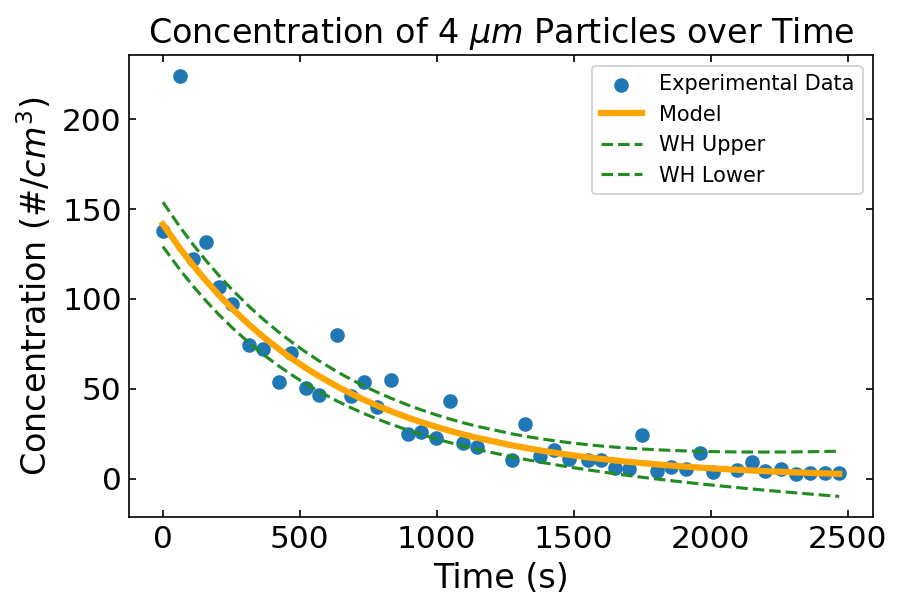

In [ ]:
# calculating confidence interval using Working-Hotelling method, plotting

# Compute the standard error
se = np.sqrt(np.sum((concentration - model_concentration)**2) / (len(time) - 2)) * np.sqrt(1 / len(time) + (time - np.mean(time))**2 / np.sum((time - np.mean(time))**2))

# Compute W for the confidence bands Working-Hoteling method
W = np.sqrt(2 * f.ppf(1 - 0.05, 2, len(time) - 2))

# Build the upper and lower confidence interval
wh_upper = model_concentration + W * se
wh_lower = model_concentration - W * se

#plot original data and fitted model

fig, ax = plt.subplots(figsize = (6.4,4), dpi = 150)
ax.scatter(time, concentration, label = 'Experimental Data')
ax.plot(time, model_concentration, c = 'orange', label = 'Model', linewidth = 3)

ax.plot(time, wh_upper, color='forestgreen', linestyle='dashed', label="WH Upper")
ax.plot(time, wh_lower, color='forestgreen', linestyle='dashed', label="WH Lower")
#add plot labels
ax.set_xlabel("Time (s)", fontsize = 16)
ax.set_ylabel("Concentration ($ \#/cm^3$)", fontsize = 16)
ax.set_title("Concentration of 4 $\mu m$ Particles over Time", fontsize = 16)

#set tick parameters
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tick_params(direction="in",top=True, right=True)

#add legend
plt.legend()

#show plot
plt.show()



**Discussion:** What do the green dashed lines tell us?

**Answer:** The dashed lines show the range within which we are 95% confident that the concentration of 4 micron particles will be given some initial concentration.

## 3. Analysis: Nonlinear Regression

Though we can easily transform an exponential function into a linear one, linearizing can cause model parameters to be weighted differently and muddies the interpretation of our error analysis. Let's compare regression results by doing a least-squares nonlinear regression. For this, we'll use SciPy's `least_squares` function. (You'll need to complete the `expoential` function before you can run the cell below.)

In [ ]:
#non linear regression

#nonlinear regression function
def exponential(theta, x):
    c_0 = theta[0]
    decay_rate = theta[1]
    ### BEGIN SOLUTION ###
    model = c_0 * np.exp(-decay_rate * x)
    ### END SOLUTION
    return model

#regression residual function to use with scipy optimize
def regression(theta, x, y):
    residual = y - exponential(theta, x)
    return residual

#initial guess of scale factor and decay rate
theta0 = np.array([100, -0.002])

#use scipy to determine best nonlinear fit
results = optimize.least_squares(regression, theta0, args = (time, concentration))

#extra nonlinear model parameters
nl_c_0, nl_decay_rate  = results.x

print(f'Initial Concentration: {round(nl_c_0)}')
print(f'Decay Rate: {round(nl_decay_rate,4)}')

Initial Concentration: 167
Decay Rate: 0.0018


### 3.1. Plot Experimental Data and Model Prediction

Again, we'd like to plot the model along with the experimental data.

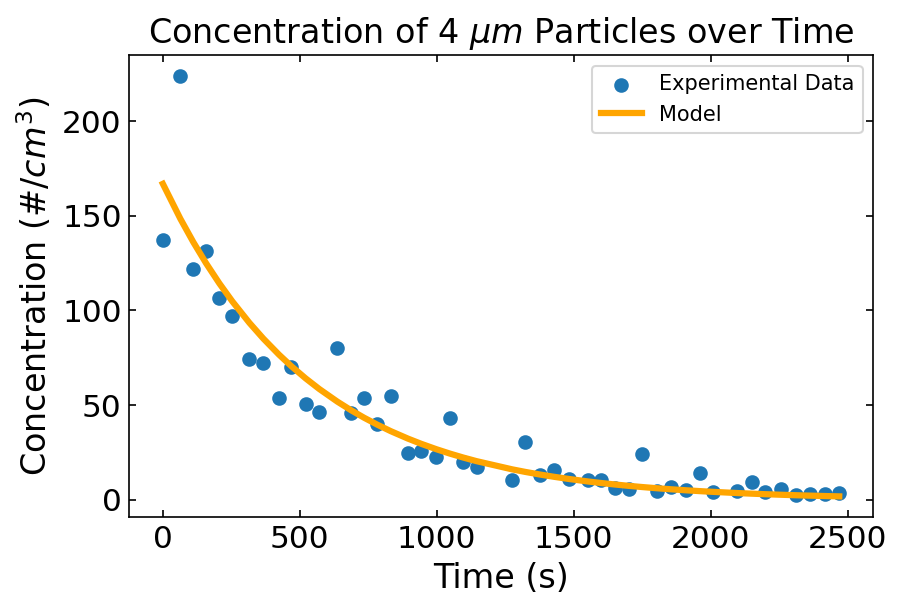

In [ ]:
#calculate modeled data values
nl_model_concentration = nl_c_0 * np.exp(-nl_decay_rate * time)

#plot original data and fitted model

fig, ax = plt.subplots(figsize = (6.4,4), dpi = 150)
ax.scatter(time, concentration, label = 'Experimental Data')
ax.plot(time, nl_model_concentration, c = 'orange', label = 'Model', linewidth = 3)

#add plot labels
ax.set_xlabel("Time (s)", fontsize = 16)
ax.set_ylabel("Concentration ($ \#/cm^3$)", fontsize = 16)
ax.set_title("Concentration of 4 $\mu m$ Particles over Time", fontsize = 16)

#set tick parameters
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tick_params(direction="in",top=True, right=True)

#add legend
plt.legend()

#show plot
plt.show()

### 3.2. Plot the Residuals



Using the previous residual plotting code, fill in the missing pieces to plot the distribution of the residuals.

*Hint: Be sure to use the variables from the nonlinear model.*

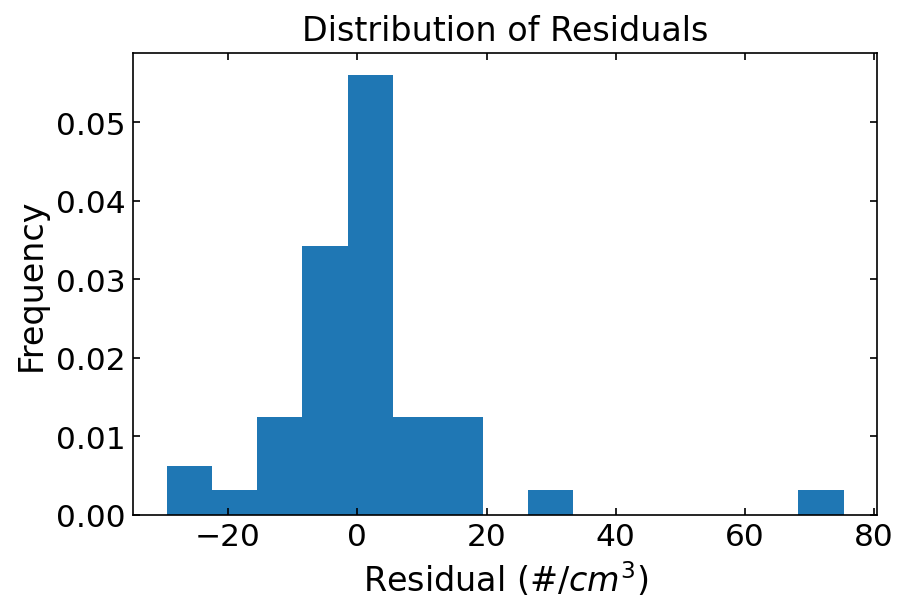

In [ ]:
# calculating the residuals
### BEGIN SOLUTION
r = concentration - nl_model_concentration
### END SOLUTION

## histogram of the residuals
fig, ax = plt.subplots(figsize = (6.4,4), dpi = 150)
plt.hist(r, bins=15, density=True)

#add plot labels
ax.set_xlabel("Residual ($\#/cm^3$)", fontsize = 16)
ax.set_ylabel("Frequency", fontsize = 16)
ax.set_title("Distribution of Residuals", fontsize = 16)

#set tick parameters
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tick_params(direction="in",top=True, right=True)

plt.show()

**Discussion:** How does this residual plot compare to that for the linear regression model?

**Answer**: This residual plot is perhaps a bit closwer to being normally distributed, though it has a bit of an extended tail to the left and maintains a couple outliers.

### 3.3. Plot the Confidence Intervals

Using the previous confidence interval plotting code above, fill in the missing parts to plot the confidence bands.

*Hint: Be sure to use the variable names from the nonlinear model.*

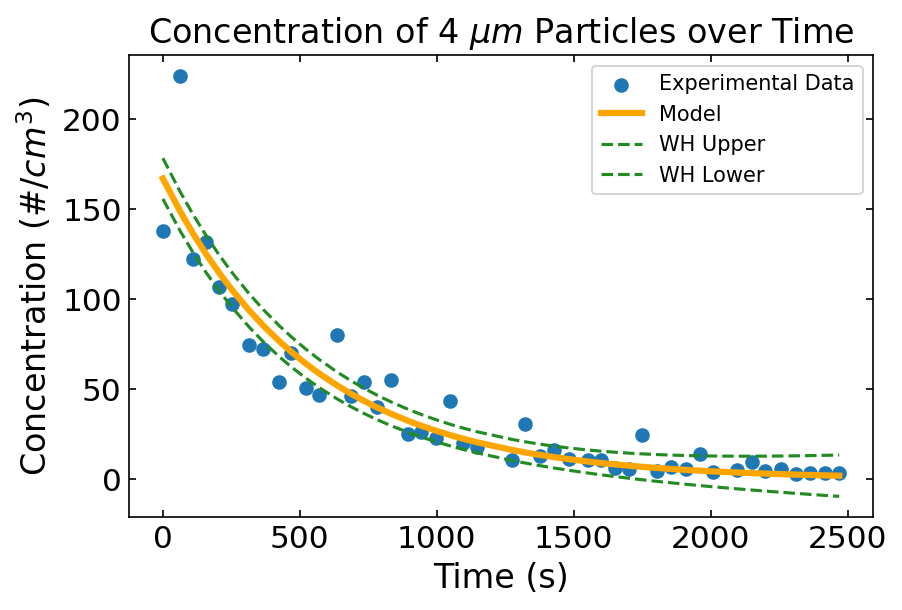

In [ ]:
# calculating confidence interval using Working-Hotelling method, plotting

# Compute the standard error
### BEGIN SOLUTION
se = np.sqrt(np.sum((concentration - nl_model_concentration)**2) / (len(time) - 2)) * np.sqrt(1 / len(time) + (time - np.mean(time))**2 / np.sum((time - np.mean(time))**2))
### END SOLUTION

# Compute W for the confidence bands Working-Hoteling method
### BEGING SOLUTION
W = np.sqrt(2 * f.ppf(1 - 0.05, 2, len(time) - 2))
### END SOLUTION

# Build the upper and lower confidence interval
wh_upper = nl_model_concentration + W * se
wh_lower = nl_model_concentration - W * se

#plot original data and fitted model

fig, ax = plt.subplots(figsize = (6.4,4), dpi = 150)
ax.scatter(time, concentration, label = 'Experimental Data')
ax.plot(time, nl_model_concentration, c = 'orange', label = 'Model', linewidth = 3)

ax.plot(time, wh_upper, color='forestgreen', linestyle='dashed', label="WH Upper")
ax.plot(time, wh_lower, color='forestgreen', linestyle='dashed', label="WH Lower")
#add plot labels
ax.set_xlabel("Time (s)", fontsize = 16)
ax.set_ylabel("Concentration ($ \#/cm^3$)", fontsize = 16)
ax.set_title("Concentration of 4 $\mu m$ Particles over Time", fontsize = 16)

#set tick parameters
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tick_params(direction="in",top=True, right=True)

#add legend
plt.legend()

#show plot
plt.show()

## Conclusion
**Discussion:** How do the results of the linear and nonlinear regression compare? Which do you think is better?

**Answer:** The nonlinear regression estimates a greater initial concentration and a greater rate of decay. Based on its residual distribution, it appears to be a modestly more reliable model than that given by the linear regression. It also visually appears to better capture the early data points.

## References

1. **Deriving Stoke's Settling Velocity from Stoke's Law**:

Cadence CFD Solutions, Cadence CFD Solutions, et al. “Deriving Stoke’s Law for Settling Velocity.” Cadence, 13 Dec. 2022, https://resources.system-analysis.cadence.com/blog/msa2022-deriving-stokes-law-for-settling-velocity